In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('NIFTY50_DATA3.CSV')

In [3]:
df.head(-10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,19-10-2018,10339.70,10380.10,10249.60,10303.55,10303.55,357500
1,22-10-2018,10405.85,10408.55,10224.00,10245.25,10245.25,297300
2,23-10-2018,10152.60,10222.10,10102.35,10146.80,10146.80,302600
3,24-10-2018,10278.15,10290.65,10126.70,10224.75,10224.75,351400
4,25-10-2018,10135.05,10166.60,10079.30,10124.90,10124.90,0
...,...,...,...,...,...,...,...
1218,27-09-2023,19637.05,19730.70,19554.00,19716.45,19716.45,203600
1219,28-09-2023,19761.80,19766.65,19492.10,19523.55,19523.55,352800
1220,29-09-2023,19581.20,19726.25,19551.05,19638.30,19638.30,243500
1221,03-10-2023,19622.40,19623.20,19479.65,19528.75,19528.75,221700


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,14590.721046,14662.610503,14491.512247,14580.114071,14580.114071,4.216149e+05
std,3225.898711,3226.109513,3223.565990,3226.558154,3226.558154,2.176953e+05
min,7735.150000,8036.950000,7511.100000,7610.250000,7610.250000,0.000000e+00
25%,11531.450000,11572.800000,11442.250000,11503.350000,11503.350000,2.626000e+05
50%,15048.400000,15133.400000,14925.450000,15030.150000,15030.150000,3.553000e+05
75%,17580.900000,17653.900000,17462.550000,17576.300000,17576.300000,5.548000e+05
max,20156.450000,20222.450000,20129.700000,20192.350000,20192.350000,1.811000e+06


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1.shape

(1233,)

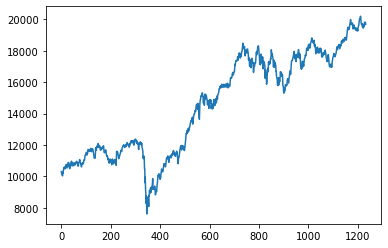

In [7]:
plt.plot(df1)

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.21405807]
 [0.2094245 ]
 [0.20159989]
 ...
 [0.96339244]
 [0.96973081]
 [0.9585721 ]]


In [10]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(801, 432)

In [12]:
train_data

array([[0.21405807],
       [0.2094245 ],
       [0.20159989],
       [0.2077952 ],
       [0.19985932],
       [0.19231686],
       [0.20986958],
       [0.20570096],
       [0.22065871],
       [0.22016992],
       [0.23388385],
       [0.23157899],
       [0.23205586],
       [0.23749215],
       [0.23644304],
       [0.22825681],
       [0.23622845],
       [0.23573569],
       [0.2389466 ],
       [0.24415241],
       [0.25060602],
       [0.24208598],
       [0.23762329],
       [0.23179755],
       [0.23989239],
       [0.24442263],
       [0.24786006],
       [0.25818027],
       [0.25961485],
       [0.2601712 ],
       [0.25903863],
       [0.25215584],
       [0.23771072],
       [0.2450664 ],
       [0.22875355],
       [0.23357786],
       [0.24855549],
       [0.25284333],
       [0.25394807],
       [0.26053679],
       [0.26215417],
       [0.26681158],
       [0.26557172],
       [0.24985893],
       [0.24266617],
       [0.24793953],
       [0.25190946],
       [0.258

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(700, 100)
(700,)


(None, None)

In [16]:
print(X_test.shape), print(Y_test.shape)

(331, 100)
(331,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 22s 741ms/step - loss: 0.0885 - val_loss: 0.0022
Epoch 2/100
11/11 [==============================] - 5s 467ms/step - loss: 0.0125 - val_loss: 0.0175
Epoch 3/100
11/11 [==============================] - 5s 421ms/step - loss: 0.0064 - val_loss: 0.0168
Epoch 4/100
11/11 [==============================] - 5s 423ms/step - loss: 0.0035 - val_loss: 9.9907e-04
Epoch 5/100
11/11 [==============================] - 5s 428ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 6/100
11/11 [==============================] - 5s 431ms/step - loss: 0.0015 - val_loss: 9.7449e-04
Epoch 7/100
11/11 [==============================] - 5s 417ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 8/100
11/11 [==============================] - 4s 392ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/100
11/11 [==============================] - 4s 415ms/step - loss: 0.0014 - val_loss: 9.6252e-04
Epoch 10/100
11/11 [==============================] - 4s 414ms/step - loss: 0.

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 81ms/step


In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13438.537332461554

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

18232.050444631474

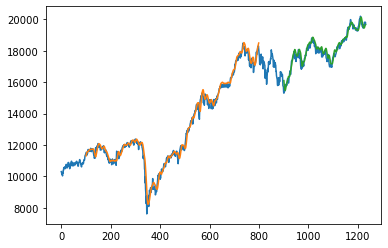

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

432

In [29]:
x_input=test_data[332:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.8654437653491867,
 0.8733359296142935,
 0.8761335548119948,
 0.8682294688486027,
 0.8645218206817624,
 0.8682056254520312,
 0.8729544352691523,
 0.8733637469102933,
 0.8834892426542471,
 0.8761891894039946,
 0.8705343305171636,
 0.8735624418817209,
 0.8826745932713937,
 0.8858338433170936,
 0.8804452356919752,
 0.8914052503159251,
 0.8857980782222366,
 0.8906661050222142,
 0.8938571462633425,
 0.8870538304416593,
 0.8786490331502692,
 0.8806916174565456,
 0.8907217396142142,
 0.9030169844461577,
 0.9202597340666503,
 0.9308700455408876,
 0.9361513578814349,
 0.9369063987728601,
 0.9447588240436813,
 0.9316052169351698,
 0.9335206364597328,
 0.9401570485054167,
 0.9357778113351509,
 0.9381184380985688,
 0.950099744875657,
 0.961779035296175,
 0.9647833032641611,
 0.9714515065052736,
 0.9830552928366492,
 0.9644455218127341,
 0.9586714459430461,
 0.9593271393487575,
 0.9670921388321505,
 0.9576819449853367,
 0.9565811748436273,
 0.9651449281121596,
 0.9635354988435954,
 0.947083555209

In [32]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96234447]
101
1 day input [0.87333593 0.87613355 0.86822947 0.86452182 0.86820563 0.87295444
 0.87336375 0.88348924 0.87618919 0.87053433 0.87356244 0.88267459
 0.88583384 0.88044524 0.89140525 0.88579808 0.89066611 0.89385715
 0.88705383 0.87864903 0.88069162 0.89072174 0.90301698 0.92025973
 0.93087005 0.93615136 0.9369064  0.94475882 0.93160522 0.93352064
 0.94015705 0.93577781 0.93811844 0.95009974 0.96177904 0.9647833
 0.97145151 0.98305529 0.96444552 0.95867145 0.95932714 0.96709214
 0.95768194 0.95658117 0.96514493 0.9635355  0.94708356 0.93556719
 0.94632454 0.95270662 0.95060443 0.95550822 0.94839892 0.93927484
 0.93977158 0.94219169 0.93426376 0.92988452 0.93651696 0.93674347
 0.94052265 0.93596856 0.92635967 0.92955866 0.93246755 0.93284905
 0.92540593 0.93983119 0.94726238 0.95092632 0.95379945 0.96301889
 0.9704024  0.98442231 0.98417196 0.99027587 0.99290659 1.
 0.99530682 0.97687588 0.96423491 0.95882245 0.9588463  0.95806344
 0.96217643 0.94684512 0.95596522 0.947258

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
len(df1)

1233

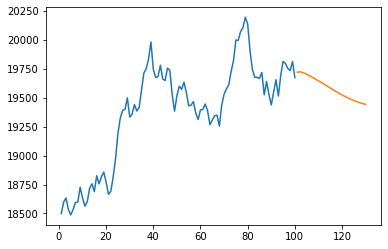

In [35]:
plt.plot(day_new,scaler.inverse_transform(df1[1133:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

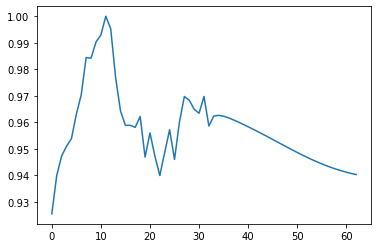

In [36]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [37]:
df3=scaler.inverse_transform(df3).tolist()

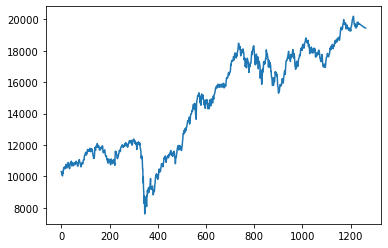

In [38]:
plt.plot(df3)